In [1]:
import pandas as pd

data = pd.read_csv('icc_results.csv', decimal=".")
data.head()

,ID,WAIST,HIP,Mesh Waist,Mesh Waist Error,Mesh Hip,Mesh Hip Error,PointCloud Waist,PointCloud Waist Error,PointCloud Hip,PointCloud Hip Error,PointCNoSeg Waist,PointCNoSeg Waist Error,PointCNoSeg Hip,PointCNoSeg Hip Error
0,R-001,95.5,99.5,95.83,0.33,111.68,12.18,96.34,0.84,107.96,8.46,221.46,125.96,333.51,234.01
1,R-002,91.0,95.0,91.73,0.72,107.22,12.22,98.74,7.74,89.30,5.70,464.15,373.15,371.82,276.82
2,R-003,81.5,91.0,81.91,0.41,105.17,14.17,78.80,2.70,88.73,2.27,307.47,225.97,246.58,155.58
3,R-004,82.1,96.7,82.20,0.10,99.77,3.07,78.56,3.54,87.39,9.31,400.90,318.80,307.93,211.23
4,R-005,83.8,99.8,83.44,0.36,106.17,6.37,87.76,3.96,101.86,2.06,569.90,486.10,414.02,314.22


In [2]:
pointcloudhip = data['PointCloud Hip'].to_numpy().reshape(-1, 1)
pointcloudwaist = data['PointCloud Waist'].to_numpy().reshape(-1, 1)

meshhip = data['Mesh Hip'].to_numpy().reshape(-1, 1)
meshwaist = data['Mesh Waist'].to_numpy().reshape(-1, 1)

hip = data['HIP'].to_numpy().reshape(-1, 1)
waist = data['WAIST'].to_numpy().reshape(-1, 1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
pc_regrhip = linear_model.LinearRegression(normalize=True)
pc_regrwaist = linear_model.LinearRegression(normalize=True)

mesh_regrhip = linear_model.LinearRegression(normalize=True)
mesh_regrwaist = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets (x_train, y_train)
pc_regrhip.fit(hip, pointcloudhip)
pc_regrwaist.fit(waist, pointcloudwaist)

mesh_regrhip.fit(hip, meshhip)
mesh_regrwaist.fit(waist, meshwaist)

# The coefficients
print('Coefficients pc hip:', pc_regrhip.coef_)
print('Coefficients pc waist:', pc_regrwaist.coef_)

print('Coefficients mesh hip:', mesh_regrhip.coef_)
print('Coefficients mesh waist:', mesh_regrwaist.coef_)

Coefficients pc hip: [[0.92139057]]
Coefficients pc waist: [[1.02365304]]
Coefficients mesh hip: [[0.57317605]]
Coefficients mesh waist: [[0.96320732]]


In [4]:
# Make predictions using the testing set (x_test)
pc_predhip = pc_regrhip.predict(hip)
pc_predwaist = pc_regrwaist.predict(waist)

mesh_predhip = mesh_regrhip.predict(hip)
mesh_predwaist = mesh_regrwaist.predict(waist)

# The mean squared error (y_test, y_pred)
print('Mean squared error pc hip: %.2f' % mean_squared_error(pointcloudhip, pc_predhip))
print('Mean squared error pc waist: %.2f' % mean_squared_error(pointcloudwaist, pc_predwaist))

print('Mean squared error mesh hip: %.2f' % mean_squared_error(meshhip, mesh_predhip))
print('Mean squared error mesh waist: %.2f' % mean_squared_error(meshwaist, mesh_predwaist))

# The coefficient of determination: 1 is perfect prediction (y_test, y_pred)
print('Coefficient of determination pc hip: %.2f' % r2_score(pointcloudhip, pc_predhip))
print('Coefficient of determination pc waist: %.2f' % r2_score(pointcloudwaist, pc_predwaist))

print('Coefficient of determination mesh hip: %.2f' % r2_score(meshhip, mesh_predhip))
print('Coefficient of determination mesh waist: %.2f' % r2_score(meshwaist, mesh_predwaist))

Mean squared error pc hip: 62.31
Mean squared error pc waist: 26.22
Mean squared error mesh hip: 44.32
Mean squared error mesh waist: 3.35
Coefficient of determination pc hip: 0.42
Coefficient of determination pc waist: 0.83
Coefficient of determination mesh hip: 0.28
Coefficient of determination mesh waist: 0.97


In [5]:
regresion = data.copy()
regresion['PC HIP Linear Regression'] = np.around(pc_predhip, 2)
regresion['PC WAIST Linear Regression'] = np.around(pc_predwaist, 2)
regresion['MESH HIP Linear Regression'] = np.around(mesh_predhip, 2)
regresion['MESH WAIST Linear Regression'] = np.around(mesh_predwaist, 2)

regresion.to_csv('regression.csv')
regresion.head()

,ID,WAIST,HIP,Mesh Waist,Mesh Waist Error,Mesh Hip,Mesh Hip Error,PointCloud Waist,PointCloud Waist Error,PointCloud Hip,PointCloud Hip Error,PointCNoSeg Waist,PointCNoSeg Waist Error,PointCNoSeg Hip,PointCNoSeg Hip Error,PC HIP Linear Regression,PC WAIST Linear Regression,MESH HIP Linear Regression,MESH WAIST Linear Regression
0,R-001,95.5,99.5,95.83,0.33,111.68,12.18,96.34,0.84,107.96,8.46,221.46,125.96,333.51,234.01,100.73,96.30,107.08,96.05
1,R-002,91.0,95.0,91.73,0.72,107.22,12.22,98.74,7.74,89.30,5.70,464.15,373.15,371.82,276.82,96.58,91.69,104.50,91.72
2,R-003,81.5,91.0,81.91,0.41,105.17,14.17,78.80,2.70,88.73,2.27,307.47,225.97,246.58,155.58,92.90,81.97,102.21,82.57
3,R-004,82.1,96.7,82.20,0.10,99.77,3.07,78.56,3.54,87.39,9.31,400.90,318.80,307.93,211.23,98.15,82.58,105.48,83.15
4,R-005,83.8,99.8,83.44,0.36,106.17,6.37,87.76,3.96,101.86,2.06,569.90,486.10,414.02,314.22,101.01,84.32,107.26,84.78


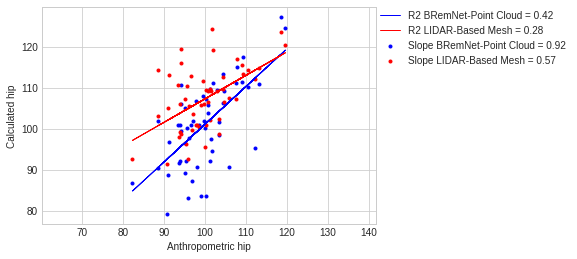

In [68]:
plt.style.use('seaborn-whitegrid')

plt.scatter(hip, pointcloudhip, color='blue', marker='.') 
plt.plot(hip, pc_predhip, color='blue', linewidth=1)
plt.scatter(hip, meshhip, color='red', marker='.') 
plt.plot(hip, mesh_predhip, color='red', linewidth=1)

plt.xlabel("Anthropometric hip")
plt.ylabel("Calculated hip")
plt.axis('equal')
plt.axis('equal')

leg = plt.legend(['R2 BRemNet-Point Cloud = 0.42',
            'R2 LIDAR-Based Mesh = 0.28',
            'Slope BRemNet-Point Cloud = 0.92',
            'Slope LIDAR-Based Mesh = 0.57'], 
            bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

plt.savefig("linearregression_hip.pdf", dpi=300)
plt.show()

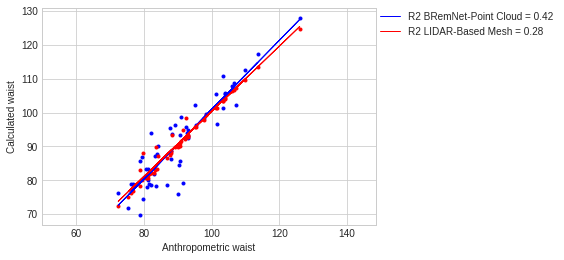

In [69]:
plt.scatter(waist, pointcloudwaist, color='blue', marker='.')
plt.plot(waist, pc_predwaist, color='blue', linewidth=1)
plt.scatter(waist, meshwaist, color='red', marker='.')
plt.plot(waist, mesh_predwaist, color='red', linewidth=1)

plt.xlabel("Anthropometric waist")
plt.ylabel("Calculated waist")
plt.axis('equal')
plt.axis('equal')

plt.legend(['R2 BRemNet-Point Cloud = 0.42',
            'R2 LIDAR-Based Mesh = 0.28'], 
           bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

plt.savefig("linearregression_waist.pdf", dpi=300)
plt.show()

subplot

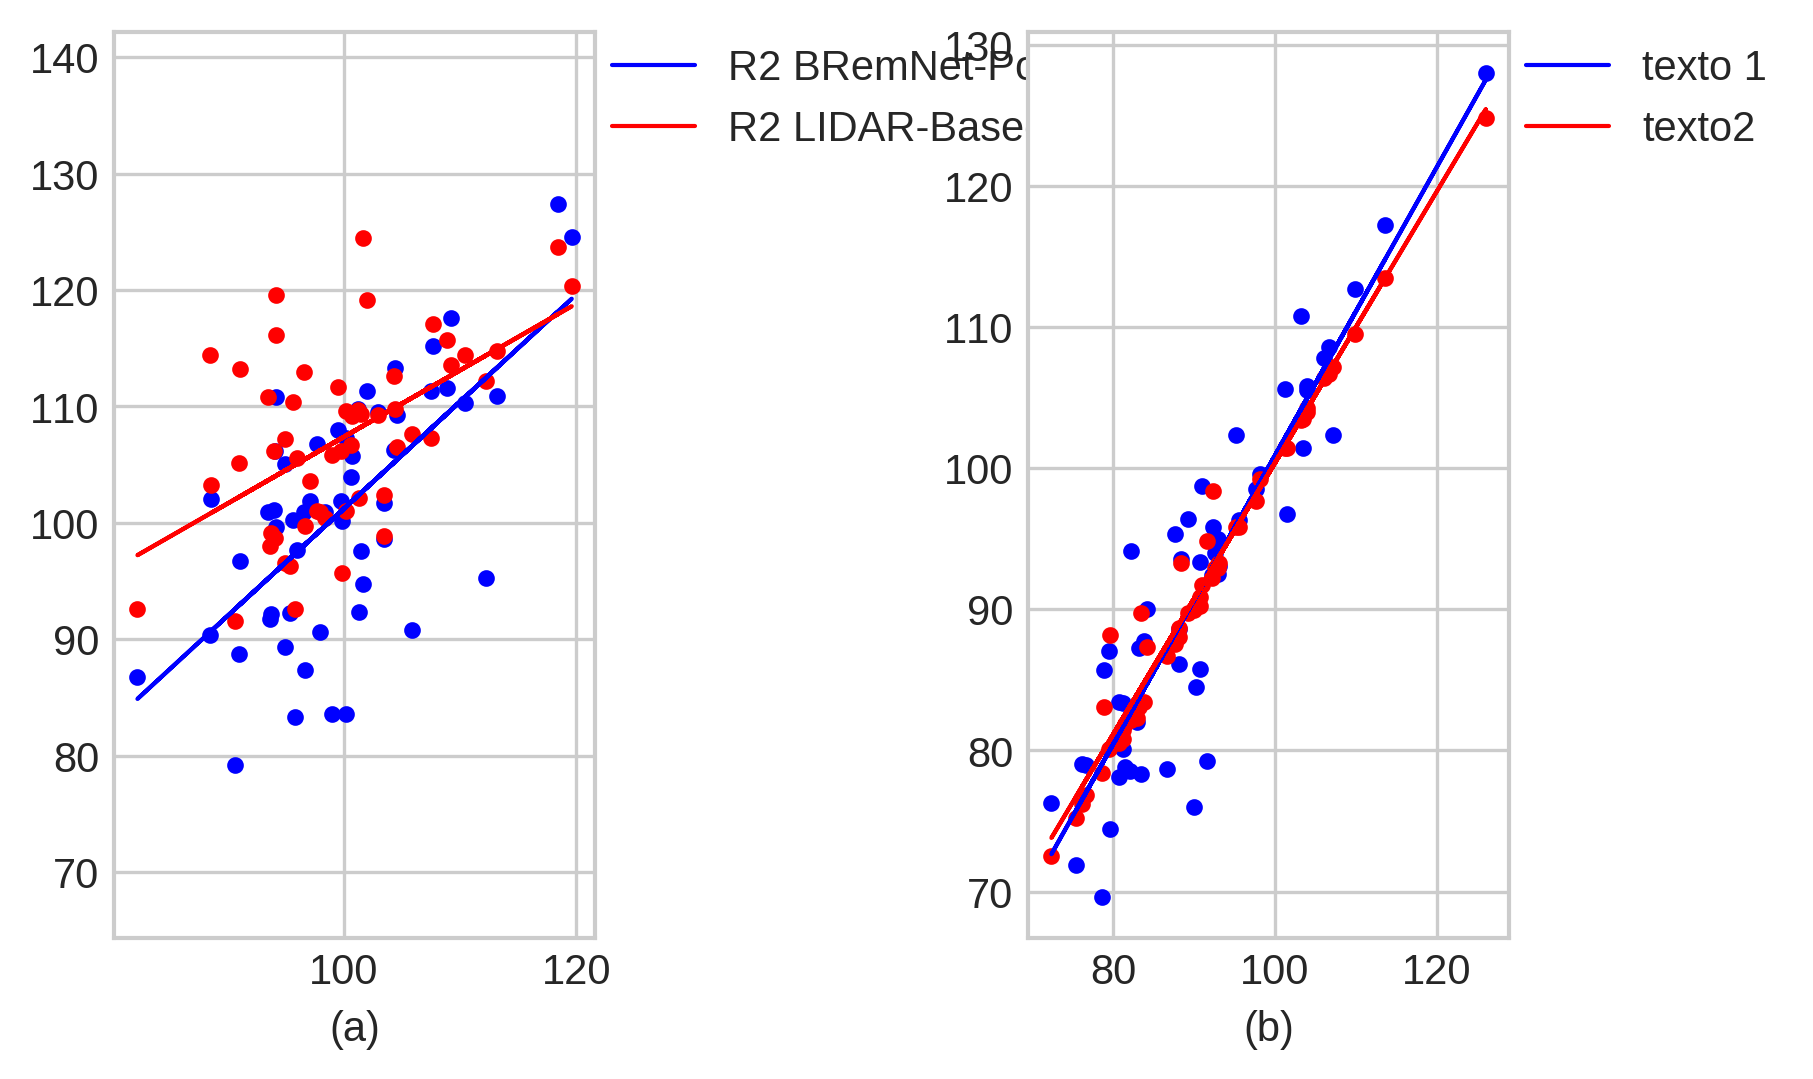

In [56]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1)
#fig.subplots_adjust(hspace=0.5, wspace=1)
#fig.figsize=(18,16)
fig.dpi= 300
fig.subplots_adjust(wspace=0.9)

ax1 = plt.subplot(121)
ax1.scatter(hip, pointcloudhip, color='blue', marker='.') 
ax1.plot(hip, pc_predhip, color='blue', linewidth=1)
ax1.scatter(hip, meshhip, color='red', marker='.') 
ax1.plot(hip, mesh_predhip, color='red', linewidth=1)
ax1.set_xlabel("(a)")
ax1.axis('equal')
ax1.legend(['R2 BRemNet-Point Cloud = 0.42',
            'R2 LIDAR-Based Mesh = 0.28'], 
           bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

ax2 = plt.subplot(122)
ax2.scatter(waist, pointcloudwaist, color='blue', marker='.')
ax2.plot(waist, pc_predwaist, color='blue', linewidth=1)
ax2.scatter(waist, meshwaist, color='red', marker='.')
ax2.plot(waist, mesh_predwaist, color='red', linewidth=1)
ax2.set_xlabel("(b)")
ax1.axis('equal')
ax2.legend(['texto 1','texto2'], bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)

#plt.savefig("linearregression_waist.png")
plt.show()

## RANSAC Regressor

In [ ]:
from sklearn import linear_model, datasets

X = hip
y = pointcloudhip

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)

print('HIP')

print('- Linear Regression')
# The coefficients
print('Coefficients:', lr.coef_)
# The mean squared error (y_test, y_pred)
print('Mean squared error hip: %.2f' % mean_squared_error(y, lr_pred))
# The coefficient of determination: 1 is perfect prediction (y_test, y_pred)
print('Coefficient of determination hip: %.2f' % r2_score(y, lr_pred))

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
ransac_pred = ransac.predict(X)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print('- RANSAC')
# The coefficients
print('Coefficients hip:', ransac.estimator_.coef_)
# The mean squared error (y_test, y_pred)
print('Mean squared error hip: %.2f' % mean_squared_error(y, ransac_pred))
# The coefficient of determination: 1 is perfect prediction (y_test, y_pred)
print('Coefficient of determination hip: %.2f' % r2_score(y, ransac_pred))

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='.')
            #label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='blue', marker='.') #gold
#            label='Outliers')
plt.plot(line_X, line_y, color='red', linewidth=lw, label='Linear regressor') #navy
plt.plot(line_X, line_y_ransac, color='green', linewidth=lw,
         label='RANSAC regressor') #cornflowerblue
plt.legend(loc='lower right')
plt.xlabel("Anthropometric hip")
plt.ylabel("Calculated hip")
plt.savefig("ransacregression_hip.png")
plt.show()

In [ ]:
X = waist
y = pointcloudwaist

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X)

print('WAIST')

print('- Linear Regression')
# The coefficients
print('Coefficients:', lr.coef_)
# The mean squared error (y_test, y_pred)
print('Mean squared error hip: %.2f' % mean_squared_error(y, lr_pred))
# The coefficient of determination: 1 is perfect prediction (y_test, y_pred)
print('Coefficient of determination hip: %.2f' % r2_score(y, lr_pred))

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
ransac_pred = ransac.predict(X)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print('- RANSAC')
# The coefficients
print('Coefficients hip:', ransac.estimator_.coef_)
# The mean squared error (y_test, y_pred)
print('Mean squared error hip: %.2f' % mean_squared_error(y, ransac_pred))
# The coefficient of determination: 1 is perfect prediction (y_test, y_pred)
print('Coefficient of determination hip: %.2f' % r2_score(y, ransac_pred))

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='.')
            #label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='blue', marker='.') #gold
#            label='Outliers')
plt.plot(line_X, line_y, color='red', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='green', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Anthropometric waist")
plt.ylabel("Calculated waist")
plt.savefig("ransacregression_waist.png")
plt.show()